In [1]:
# Lecture 17: Time Series - Part 2
# http://iacs-courses.seas.harvard.edu/courses/am207/blog/lecture-17.html

In [3]:
%matplotlib inline
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import pandas as pd
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
import seaborn as sns
import statsmodels.api as sm
import statsmodels.graphics.tsaplots as tsaplots
from IPython.display import Image

In [4]:
plt.style.use('ggplot')
import warnings
warnings.filterwarnings("ignore")

In [5]:
# 1. Foundational concepts in Time Series

In [6]:
# 2. An exploration of models and stationarity

In [8]:
# Power spectrum 
def powspec(samps):
    ps = np.abs(np.fft.fft(samps))**2
    time_step = 1. / 30. #assume Hertz
    freqs = np.fft.fftfreq(samps.size, time_step)
    idx = np.argsort(freqs)
    return freqs[idx], ps[idx]

def plot_powspec(samps, title):
    f,p = powspec(ts)
    plt.plot(f,p)
    plt.xlabel("frequency (Hz)")
    plt.ylabel("Power")
    plt.title(title+ " Power Spectrum")

In [9]:
# AR(1) model
def ts_gen_ar1(size, sigma, alpha1):
    e=sigma*np.random.randn(size)
    x=np.zeros(size)
    for i in np.arange(1,size,1):
        x[i] = alpha1*x[i-1] + e[i]
    return x

In [10]:
# The AR(2) Model
# AR(2): $x_t = 0.75x_{t-1} -0.125x_{t-2} + z_t$: STATIONARY, REAL ROOTS
from statsmodels.tsa.arima_process import arma_generate_sample
def gen_ar2(alpha1, alpha2, size):
    ar = [1, -alpha1, -alpha2]
    ma = [1.]
    return arma_generate_sample(ar, ma, size)

In [11]:
# The partial autocorrelation function, or PACF

In [12]:
# 3. Other Models

In [13]:
# MA(q) and invertibility
def gen_ma2(beta1, beta2, size, sigma=1.0):
    ar = [1.]
    ma = [1., beta1, beta2]
    return arma_generate_sample(ar, ma, size, sigma=sigma)

In [14]:
# 4. Inference and Prediction

In [15]:
# 4. Inference and Prediction


In [16]:
ar=[1, -0.9, 0.08]
ma=[1, 0.5, 0.9]
samps=arma_generate_sample(ar, ma, 5000)

In [17]:
arma22 = sm.tsa.ARMA(samps, (2, 2)).fit(method='mle')
#note the signs of the arparams are reversed compared to our definition
print (arma22.arparams)
print (arma22.maparams)

[ 0.8825748  -0.05938132]
[0.49871068 0.90140122]


In [18]:
arma22.aic

14206.035674951885

In [19]:
# Lets fit a ARMA(2,1) to the model and check its AIC - As expected, the AIC is higher
arma21 = sm.tsa.ARMA(samps, (2,1)).fit(method="mle")
print (arma21.arparams)
print (arma21.maparams)
arma21.aic

[ 1.55546785 -0.63475237]
[-0.2520818]


16370.08615639132

In [20]:
# The case of AR(p)

In [21]:
# Prediction or Forecasting

In [24]:
# 5. Putting it all together, the Box Jenkins procedure

In [25]:
# data : the log quarterly Australian Consumer Price Index (CPI) measured from 1972 to 1991
df=pd.read_csv("AUSCPIALLQINMEI.csv")
df.head()

,DATE,VALUE
0,1955-01-01,6.763788
1,1955-04-01,6.867846
2,1955-07-01,6.867846
3,1955-10-01,6.971904
4,1956-01-01,6.971904


In [26]:
df.DATE = pd.to_datetime(df.DATE)
df.head()

,DATE,VALUE
0,1955-01-01,6.763788
1,1955-04-01,6.867846
2,1955-07-01,6.867846
3,1955-10-01,6.971904
4,1956-01-01,6.971904


In [27]:
dfsub=df[(df.DATE> '1971') & (df.DATE < '1990')]
dfsub.head()

,DATE,VALUE
65,1971-04-01,10.613944
66,1971-07-01,10.926119
67,1971-10-01,11.134235
68,1972-01-01,11.238293
69,1972-04-01,11.342352


In [28]:
dfsub=dfsub.set_index('DATE')
dfsub.head()

,VALUE
DATE,
1971-04-01,10.613944
1971-07-01,10.926119
1971-10-01,11.134235
1972-01-01,11.238293
1972-04-01,11.342352


In [30]:
cpi=dfsub.VALUE
cpi[0:10]

DATE
1971-04-01    10.613944
1971-07-01    10.926119
1971-10-01    11.134235
1972-01-01    11.238293
1972-04-01    11.342352
1972-07-01    11.550468
1972-10-01    11.654527
1973-01-01    11.862643
1973-04-01    12.278876
1973-07-01    12.695109
Name: VALUE, dtype: float64

In [31]:
type(cpi)

pandas.core.series.Series

In [32]:
lcpi = np.log(cpi)

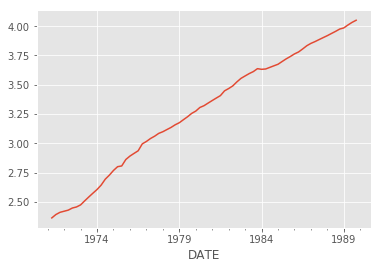

In [33]:
lcpi.plot()

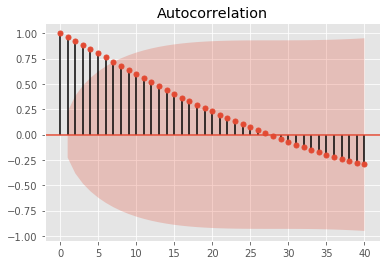

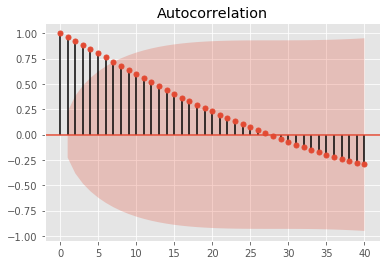

In [34]:
# ACF, PACF
tsaplots.plot_acf(lcpi, lags=40)

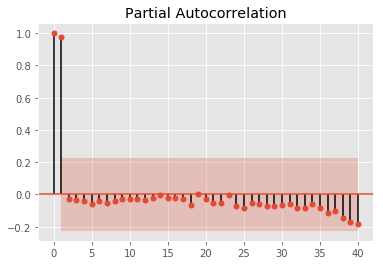

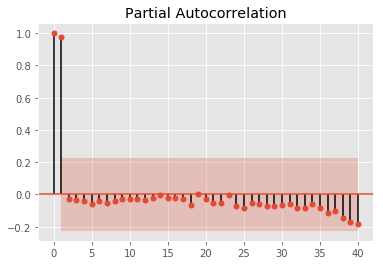

In [35]:
tsaplots.plot_pacf(lcpi, lags=40)

In [36]:
# remove trend
dcpi=lcpi.diff()[1:]
dcpi[0:10]

DATE
1971-07-01    0.028988
1971-10-01    0.018868
1972-01-01    0.009302
1972-04-01    0.009217
1972-07-01    0.018182
1972-10-01    0.008969
1973-01-01    0.017700
1973-04-01    0.034486
1973-07-01    0.033336
1973-10-01    0.032261
Name: VALUE, dtype: float64

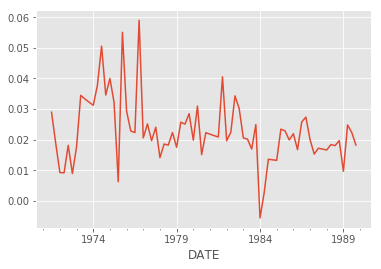

In [37]:
dcpi.plot()

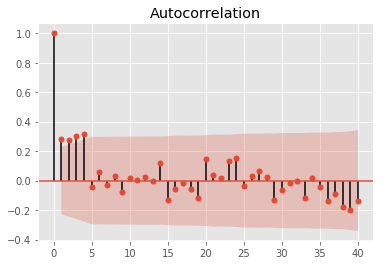

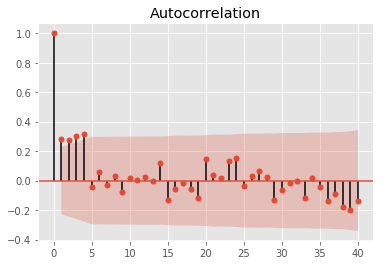

In [38]:
tsaplots.plot_acf(dcpi, lags=40)

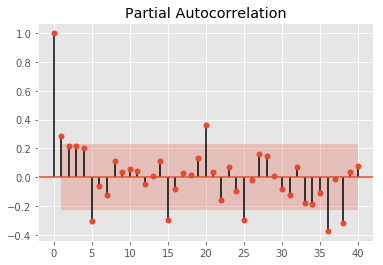

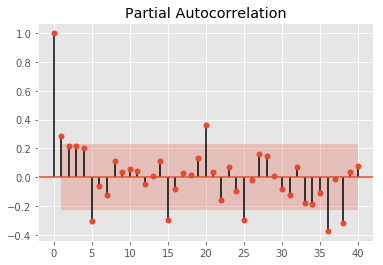

In [39]:
tsaplots.plot_pacf(dcpi, lags=40)

Ok, no trend, and the autocorrelation has also died down fast. The PACF is a bit muddled, but also dies fast, so lets stay with the AR(2), and now as we know, a 1-differencing, thus an ARIMA(2,1,0) for the log quarterly Australian CPI. This model has one degree of nonseasonal differencing and two AR lags. By default, the innovation distribution is Gaussian with a constant variance.

In [40]:
# fit the model
model = sm.tsa.ARIMA(lcpi, order=(2,1,0))
fit = model.fit(method='mle')
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.VALUE   No. Observations:                   74
Model:                 ARIMA(2, 1, 0)   Log Likelihood                 237.099
Method:                           mle   S.D. of innovations              0.010
Date:                Wed, 21 Aug 2019   AIC                           -466.199
Time:                        11:36:09   BIC                           -456.983
Sample:                    07-01-1971   HQIC                          -462.522
                         - 10-01-1989                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0228      0.002     11.601      0.000       0.019       0.027
ar.L1.D.VALUE     0.2206      0.113      1.953      0.055      -0.001       0.442
ar.L2.D.VALUE     0.2079      0.113      1.846      0.069      -0.013       0.429
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.7258           +0.0000j            1.7258            0.0000
AR.2           -2.7867           +0.0000j            2.7867            0.5000
-----------------------------------------------------------------------------
"""

In [41]:
# check p-values
fit.pvalues

const            4.702125e-18
ar.L1.D.VALUE    5.480245e-02
ar.L2.D.VALUE    6.901924e-02
dtype: float64

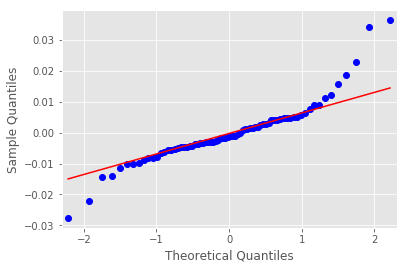

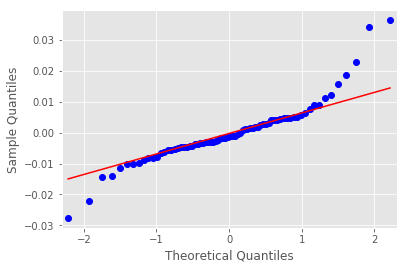

In [75]:
sm.qqplot(fit.resid, line='q') # fixed probrom

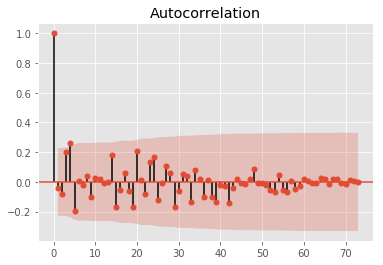

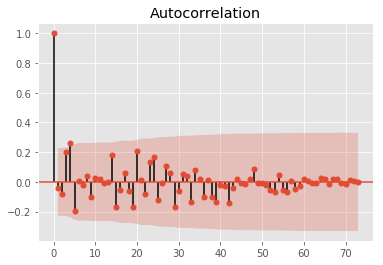

In [43]:
# check residues
tsaplots.plot_acf(fit.resid)

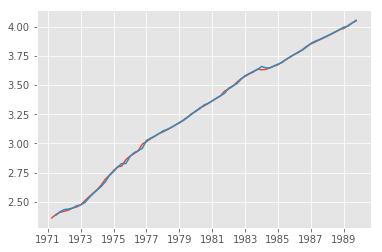

In [44]:
# in-sample prediction
insample_predict=fit.predict(typ='levels')
plt.plot(lcpi)
plt.plot(insample_predict)

In [68]:
# forecast
start=pd.datetime(1990, 1, 1)
end = pd.datetime(1992, 1, 1)
print (start, end)

1990-01-01 00:00:00 1992-01-01 00:00:00


In [69]:
ospredict=fit.predict(start=start, end=end, typ='levels')

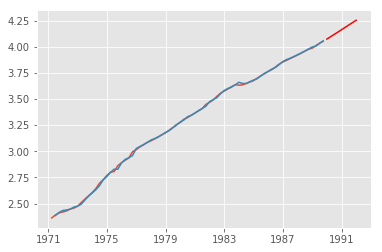

In [74]:
plt.plot(lcpi)
plt.plot(insample_predict)
plt.plot(pd.date_range(start, end, freq="QS"), ospredict, color = 'red') # fix problem

In [53]:
dcpi.tail()

DATE
1988-10-01    0.019725
1989-01-01    0.009718
1989-04-01    0.024834
1989-07-01    0.022389
1989-10-01    0.018282
Name: VALUE, dtype: float64

In [66]:
ospredict

1990-01-01    4.072470
1990-04-01    4.094101
1990-07-01    4.116428
1990-10-01    4.138888
1991-01-01    4.161523
1991-04-01    4.184224
1991-07-01    4.206975
1991-10-01    4.229752
1992-01-01    4.252544
1992-04-01    4.275346
1992-07-01    4.298152
1992-10-01    4.320962
1993-01-01    4.343773
1993-04-01    4.366586
1993-07-01    4.389399
1993-10-01    4.412212
1994-01-01    4.435025
Freq: QS-OCT, dtype: float64

In [45]:
# ARIMA(p,d,q) Model

In [44]:
# http://iacs-courses.seas.harvard.edu/courses/am207/blog/lecture-17.html